### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

Classifying iris flowers using the K-Nearest Neighbors (KNN) algorithm

Business Understanding:

Botanists require reliable methods to differentiate between species of flowers. Machine learning models can learn from measurements of known species to predict the species of new flowers. In this study, the Iris flower dataset is utilized.

Objective:
Develop a machine learning model to classify iris flowers into three species based on their measurements: Setosa, Versicolour, and Virginica.

Data Understanding:
Dataset: The Iris dataset includes measurements (sepal length, sepal width, petal length, petal width) of three species of iris flowers.
Attributes: Four numerical attributes and a categorical target variable (species).

Data Preparation:
Data Cleaning: Addressed missing values and removed duplicated records.
Feature Selection: All four attributes were deemed relevant for classification.
Data Transformation: Categorical variables (species) were encoded into numerical labels.
Data Split: The dataset was split into training (75%) and testing (25%) sets after shuffling.
Visualizations: Utilized pair plots for feature exploration, and confusion matrix for model understanding.

Modeling:
Technique: Employed the K Nearest Neighbors (KNN) algorithm for classification.
Parameter Tuning: Used GridSearch cross-validation to find the optimal number of neighbors (K) that minimized validation error (K=7).

Evaluation:
Model Evaluation Metrics: Assessed accuracy, precision, recall, and F1-score to understand model performance.

Deployment:
Integration: Identified the best-fitting model ready for deployment.
Monitoring: Planned to monitor model performance and consider retraining based on performance metrics.


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, confusion_matrix

import mglearn
import researchpy as rp 
from sklearn.metrics import precision_score

import warnings
warnings.filterwarnings("ignore")

In [176]:
# Load Iris Dataset
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_dataset = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)

# Add target (species) column to the DataFrame
iris_df['species'] = iris_dataset.target

# Map target numerical values to actual species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [177]:
# Export DataFrame to CSV
iris_df.to_csv('C:\\Users\\Luswata\\Dropbox\\ML_AI_UCBerkeley\\MODULE_12_KNN\\iris_data.csv', index=False)


In [178]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


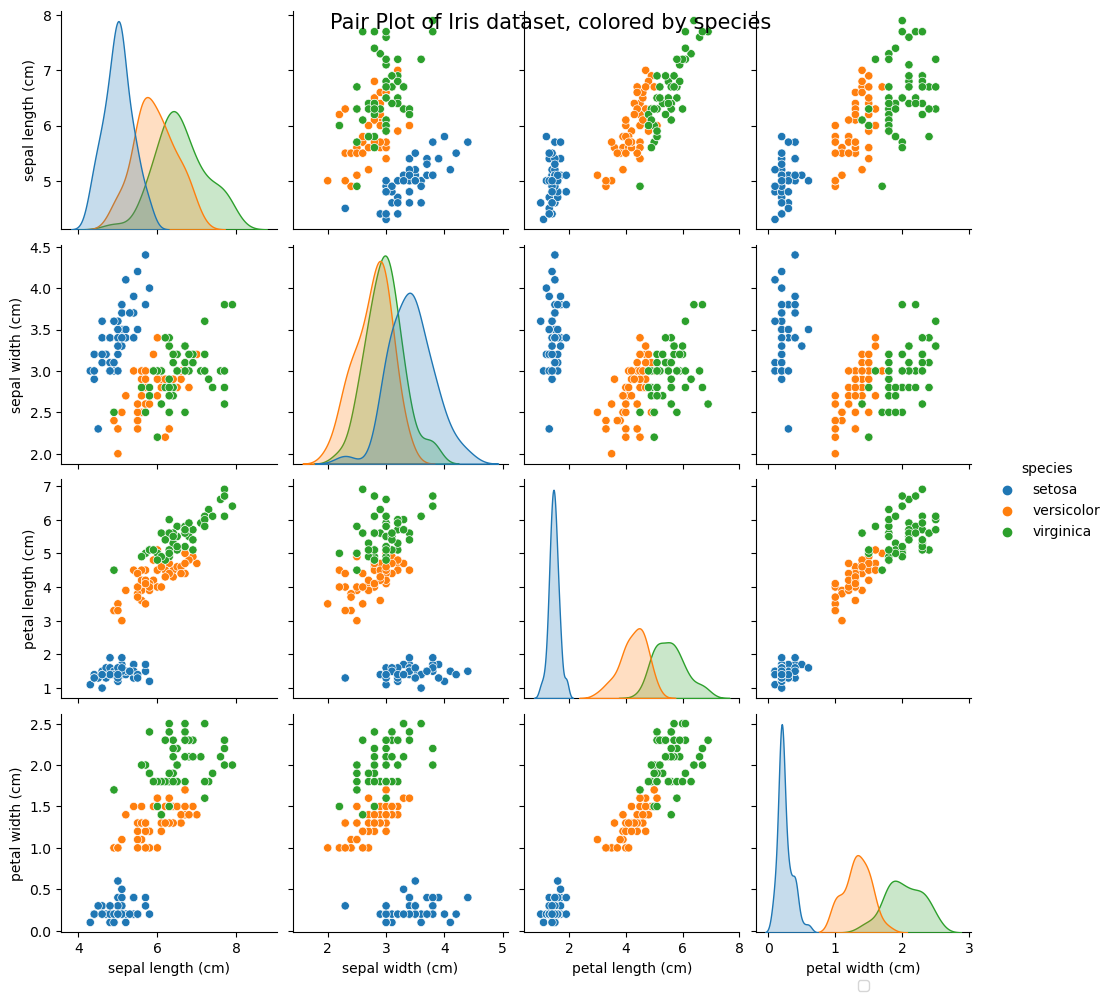

In [179]:
# Create a pair plot
sns.pairplot(iris_df, hue='species', height=2.5)
plt.suptitle('Pair Plot of Iris dataset, colored by species', size=15)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

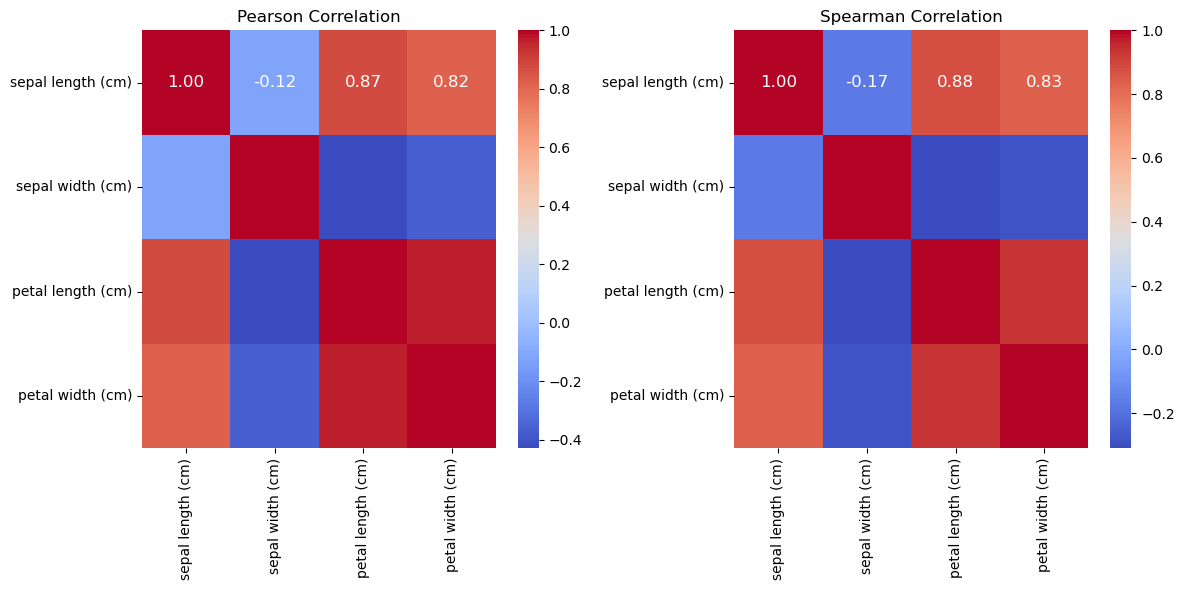

In [180]:
# Visualize correlations

# Select specific columns of interest
cols_of_interest = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Calculate correlation matrix (Pearson and Spearman)
correlation_matrix_pearson = iris_df[cols_of_interest].corr(method='pearson')
correlation_matrix_spearman = iris_df[cols_of_interest].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(12, 6))

# Heatmap for Pearson correlations
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Pearson Correlation')

# Heatmap for Spearman correlations
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Spearman Correlation')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

In [181]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [182]:
# List of variables to compute missing percentage for 
vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species']

# Loop over each variable to compute percent missingness and keep only those with > 5% missingness
selected_vars = []
for column_name in vars:
    missing_percentage = (iris_df[column_name].isnull().sum() / len(iris_df)) * 100
    if missing_percentage >=0:
        selected_vars.append(column_name)
        print(f"The percentage of missing values in column '{column_name}' is: {missing_percentage:.2f}%")

The percentage of missing values in column 'sepal length (cm)' is: 0.00%
The percentage of missing values in column 'sepal width (cm)' is: 0.00%
The percentage of missing values in column 'petal length (cm)' is: 0.00%
The percentage of missing values in column 'petal width (cm)' is: 0.00%
The percentage of missing values in column 'species' is: 0.00%


In [183]:
# Identify any duplicated records
print("Original DataFrame shape:", iris_df.shape)

# Check for duplicates
duplicates = iris_df.duplicated()

# Get the duplicated rows
duplicated_rows = iris_df[duplicates]

# Print out any duplicates found
print("\nDuplicates in DataFrame:")
print(iris_df[duplicates])

# Drop duplicated records
iris_nodup = iris_df[~duplicates]
print("\nDataFrame shape after dropping duplicates:", iris_nodup.shape)


Original DataFrame shape: (150, 5)

Duplicates in DataFrame:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

       species  
142  virginica  

DataFrame shape after dropping duplicates: (149, 5)


In [184]:
# duplicated_rows

In [185]:
# Encode species names to numerical values
le = LabelEncoder()

df = iris_nodup
df['species_encoded'] = le.fit_transform(df['species'])

# Rename columns
df = df.rename(columns={
    'sepal length (cm)': 'sepal_len',
    'sepal width (cm)': 'sepal_wid',
    'petal length (cm)': 'petal_len',
    'petal width (cm)': 'petal_wid'
})
df

,sepal_len,sepal_wid,petal_len,petal_wid,species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


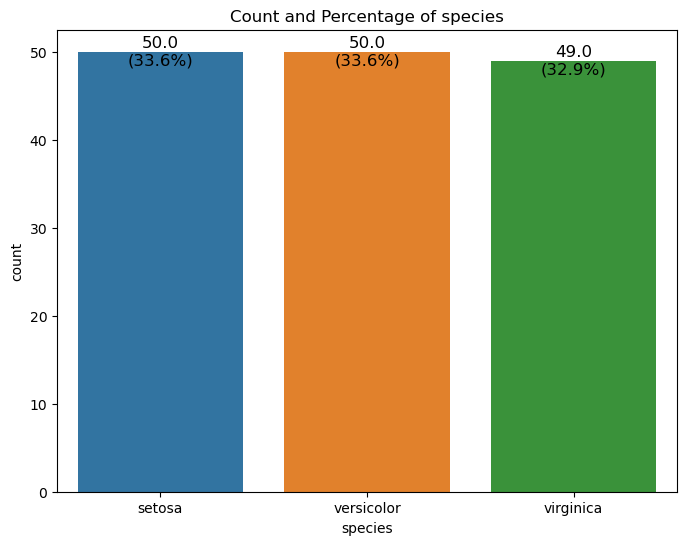

In [186]:
# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='species')

# Add counts and percentages inside each bar
total = len(df['species'])
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(f'{count}\n({percentage})', 
                (x, y), 
                ha='center', va='center', fontsize=12, color='black')

plt.title('Count and Percentage of species')
plt.show()

In [187]:
rp.summary_cat(df['species'])

,Variable,Outcome,Count,Percent
0,species,setosa,50,33.56
1,,versicolor,50,33.56
2,,virginica,49,32.89


In [188]:
df.columns

Index(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'species',
       'species_encoded'],
      dtype='object')

SPLITTING THE DATASET

In [189]:
# Define features (X) and target (y)
X = df.drop(['species', 'species_encoded'], axis=1)  # Features
y = df['species_encoded']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(111, 4) (38, 4) (111,) (38,)


Find the best parameter K and best score

In [190]:
# Find the best parameter K and best score

# Define the parameter grid (K values to test)
param_grid = {'n_neighbors': list(range(1, 22, 2))}

# Instantiate KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

best_k = list(grid_search.best_params_.values())[0]
best_acc = grid_search.score(X_test, y_test)

# Print best parameters and best score
print("Best k value/parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)
print(f"Accuracy on test data: {best_acc:.4f}")

Best k value/parameters found:  {'n_neighbors': 7}
Best score found:  0.9549407114624506
Accuracy on test data: 1.0000


MODEL THE BUILDNG

In [191]:
# Building the k-Nearest Neighbors Model

# Define the pipeline steps
scale = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform',algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

# Create the pipeline
knn_pipe = Pipeline([
    ('scale', scale),   # Step 1: StandardScaler for scaling
    ('knn', knn)        # Step 2: KNeighborsClassifier with n_neighbors=10
])

# Train the pipeline on X_train and y_train
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

EVALUATING THE MODEL

In [192]:
# Making predictions on X_test
predictions = knn_pipe.predict(X_test)
print(X_test.shape, predictions.shape)

(38, 4) (38,)


In [193]:
# test set score
pred_score = np.mean(predictions==y_test)

print("The Test Set Score/Accuracy:", pred_score)

The Test Set Score/Accuracy: 1.0


In [194]:
y_test.value_counts(normalize = True)

species_encoded
0    0.394737
2    0.315789
1    0.289474
Name: proportion, dtype: float64

In [195]:
# Calculate precision for each class
precision_scores = precision_score(y_test, predictions, average=None)
for i, score in enumerate(precision_scores):
    print(f"Precision score for class {i}: {score:.4f}")
    

Precision score for class 0: 1.0000
Precision score for class 1: 1.0000
Precision score for class 2: 1.0000


In [196]:
# Evaluate metrics
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=iris.target_names))

Accuracy: 1.0000

Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



The evaluation metrics above suggest an excellent performance of the KNN model on the test dataset. 

Accuracy measures the proportion of correctly predicted instances (both true positives and true negatives) out of the total number of instances.
An accuracy of 1.00 (or 100%) indicates that the model predicted all instances in the test set correctly.

The confusion matrix provides a tabular representation of predicted vs. actual classifications. The rows represent the actual classes (setosa, versicolor, virginica), while columns represent the predicted classes. The diagonal elements (from top-left to bottom-right) represent the number of correctly classified instances for each class while the off-diagonal elements represent misclassifications.
In this case:
setosa: All 15 instances in the test set were correctly classified as setosa.
versicolor: All 11 instances in the test set were correctly classified as versicolor.
virginica: All 12 instances in the test setwere correctly classified as virginica.

Classification Report:
Precision: Indicates the proportion of true positive predictions out of all positive predictions made.
Recall: Indicates the proportion of true positive predictions out of all actual positives.
F1-score: Harmonic mean of precision and recall, providing a balance between them.
Support: Number of instances for each class in the test set.

Interpretation:
Precision, Recall, and F1-score: All metrics are perfect (1.00) for each class, indicating that the model achieved flawless precision, recall, and F1-score for each class.
Accuracy: The model correctly classified all instances in the test set (38 out of 38), resulting in an accuracy of 100%.
Macro avg and Weighted avg: Both metrics also show perfect scores (1.00) across all classes, indicating that the model's performance is consistent and excellent across all classes.

Conclusion:
The KNN model exhibits outstanding performance on the test dataset, achieving perfect accuracy and classification metrics. This suggests that the model is well-suited for the multi-category classification task on the Iris dataset, with no errors in prediction across the three classes (setosa, versicolor, virginica).

Making predictions on the entire dataset

In [197]:
# Load the iris dataset
X = df.drop(['species', 'species_encoded'], axis=1)  # Features
y = df['species_encoded']  # Target

# Assuming knn_pipe is already fitted on X_train and y_train
knn_pipe = KNeighborsClassifier(n_neighbors=7)
knn_pipe.fit(X, y)

# Making predictions on the entire dataset X
y_pred = knn_pipe.predict(X)

# Creating a DataFrame combining original data with predictions
df_combined = df.copy()  # Make a copy of df
df_combined['pred_species'] = y_pred  # Add predictions as a new column

# Display the combined DataFrame
print("Combined DataFrame with Predictions:")
print(df_combined.sample(10))

Combined DataFrame with Predictions:
     sepal_len  sepal_wid  petal_len  petal_wid     species  species_encoded  \
98         5.1        2.5        3.0        1.1  versicolor                1   
79         5.7        2.6        3.5        1.0  versicolor                1   
17         5.1        3.5        1.4        0.3      setosa                0   
57         4.9        2.4        3.3        1.0  versicolor                1   
137        6.4        3.1        5.5        1.8   virginica                2   
141        6.9        3.1        5.1        2.3   virginica                2   
58         6.6        2.9        4.6        1.3  versicolor                1   
147        6.5        3.0        5.2        2.0   virginica                2   
8          4.4        2.9        1.4        0.2      setosa                0   
133        6.3        2.8        5.1        1.5   virginica                2   

     pred_species  
98              1  
79              1  
17              0  
57

In [198]:
pd.crosstab(df_combined['species'], df_combined['species_encoded'], dropna=False, margins=True)

species_encoded,0,1,2,All
species,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,0,49,49
All,50,50,49,149


In [199]:
pd.crosstab(df_combined['pred_species'], df_combined['species_encoded'], dropna=False, margins=True)

species_encoded,0,1,2,All
pred_species,,,,
0,50,0,0,50
1,0,47,1,48
2,0,3,48,51
All,50,50,49,149


NEW DATA PREDICTIONS

In [200]:
# Making predictions on new data
X_new = np.array([[5, 2.9, 1, 0.2],
                  [2.1, 3.3, 4.7, 5.6],
                  [4.9, 3.0, 1.4, 0.2],
                  [6.0, 3.0, 4.8, 1.8],
                  [5.7, 2.8, 4.1, 1.3],
                  [5.5, 2.4, 3.8, 1.1]])

# Predicting on new data
new_predictions = knn_pipe.predict(X_new)

# Create a DataFrame with X_new and new_predictions
df_new = pd.DataFrame(X_new, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
df_new['predicted_species'] = new_predictions

# Get species names
# Load the Iris dataset to get species names
iris = load_iris()
species_names = iris.target_names
df_new['predicted_species_name'] = pd.Series(new_predictions).map({i: species_names[i] for i in range(len(species_names))})

print("DataFrame with new data and predictions:")
print(df_new)

DataFrame with new data and predictions:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.0               2.9                1.0               0.2   
1                2.1               3.3                4.7               5.6   
2                4.9               3.0                1.4               0.2   
3                6.0               3.0                4.8               1.8   
4                5.7               2.8                4.1               1.3   
5                5.5               2.4                3.8               1.1   

   predicted_species predicted_species_name  
0                  0                 setosa  
1                  2              virginica  
2                  0                 setosa  
3                  2              virginica  
4                  1             versicolor  
5                  1             versicolor  
